In [31]:
# Importing Libraries
import numpy as np
import os
from scipy.io import loadmat
import torch 
from torch.autograd import Variable
import torchvision
from matplotlib import pyplot as plt
import utils

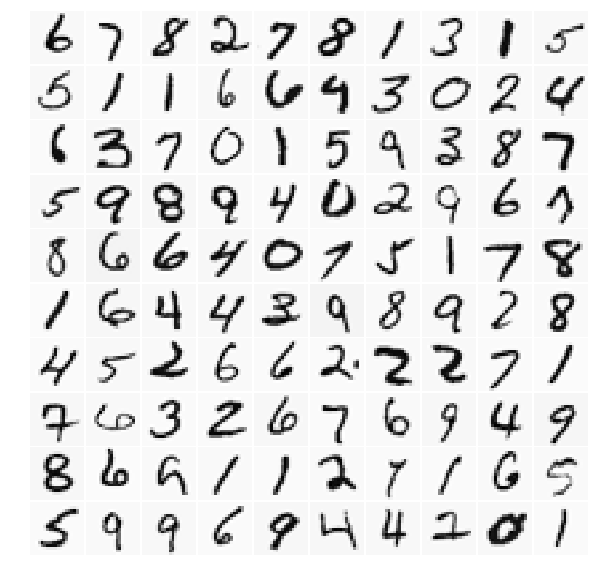

In [32]:
# Importing Data 
data = loadmat(os.path.join('Data', 'ex3data1.mat'))
X, y = data['X'], data['y'].ravel()
y[y == 10] = 0
m = y.size
indices = np.random.permutation(m)
# Randomly select 100 data points to display
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]
utils.displayData(sel)

In [34]:
weights = loadmat(os.path.join('Data', 'ex3weights.mat'))
Theta1, Theta2 = weights['Theta1'], weights['Theta2']
Theta2 = np.roll(Theta2, 1, axis=0)

In [37]:
def predict(Theta1, Theta2, X):
    """
    Predict the label of an input given a trained neural network.
    
    Parameters
    ----------
    Theta1 : array_like
        Weights for the first layer in the neural network.
        It has shape (2nd hidden layer size x input size)
    
    Theta2: array_like
        Weights for the second layer in the neural network. 
        It has shape (output layer size x 2nd hidden layer size)
    
    X : array_like
        The image inputs having shape (number of examples x image dimensions).
    
    Return 
    ------
    p : array_like
        Predictions vector containing the predicted label for each example.
        It has a length equal to the number of examples.
    
    Instructions
    ------------
    Complete the following code to make predictions using your learned neural
    network. You should set p to a vector containing labels 
    between 0 to (num_labels-1).
     
    Hint
    ----
    This code can be done all vectorized using the numpy argmax function.
    In particular, the argmax function returns the index of the  max element,
    for more information see '?np.argmax' or search online. If your examples
    are in rows, then, you can use np.argmax(A, axis=1) to obtain the index
    of the max for each row.
    
    Note
    ----
    Remember, we have supplied the `sigmoid` function in the `utils.py` file. 
    You can use this function by calling `utils.sigmoid(z)`, where you can 
    replace `z` by the required input variable to sigmoid.
    """
    # Make sure the input has two dimensions
    if X.ndim == 1:
        X = X[None]  # promote to 2-dimensions
    # useful variables
    m = X.shape[0]
    num_labels = Theta2.shape[0]
    # You need to return the following variables correctly 
    p = np.zeros(X.shape[0])
    # ====================== YOUR CODE HERE ======================
    X = [ones(m, 1) X]
    t1 = sigmoid(X * Theta1)
    t1 = [ones(m, 1) t1]
    t2 = sigmoid( t1 * Theta2)
    [~, p] = max(t2, [], 2)
    # =============================================================
    return p

SyntaxError: invalid syntax (<ipython-input-37-bc3f5e5bd64c>, line 53)

In [ ]:
def generate_adversial_image(epochs,learning_rate,_lambda,x_target,y_goal, Theta1, Theta2):
    torch.manual_seed(5)
    Theta1 = Variable(torch.from_numpy(Theta1), requires_grad = False)
    Theta2 = Variable(torch.from_numpy(Theta2), requires_grad = False)
    x = Variable(torch.randm(1, 400), requires_grad = True)
    loss = []
#     plt.imshow(x.reshape((28,28)))
    for epoch in range(epochs):
        v = torch.mm(w,x) + b
        y = torch.nn.Sigmoid()(v)
        c = (1/2) * torch.sum((y_goal-y)**2) + _lambda * torch.sum((x - x_target)**2)
        loss.append(c)
        print("Epoch {} : Loss {}".format(epoch,c))
        c.backward()
        x.data = x.data - learning_rate * ( x.grad + _lambda * ( x - x_target) )
    return x, loss